In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import pickle
import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('Diseases_dataset/Asthama.csv')

In [3]:
df.columns

Index(['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
       'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
       'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
       'Age_60+', 'Gender_Female', 'Gender_Male', 'Severity_Mild',
       'Severity_Moderate', 'Severity_None'],
      dtype='object')

In [10]:
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Tiredness                316800 non-null  int64
 1   Dry-Cough                316800 non-null  int64
 2   Difficulty-in-Breathing  316800 non-null  int64
 3   Sore-Throat              316800 non-null  int64
 4   None_Sympton             316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   None_Experiencing        316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

In [12]:
df.isnull().sum()

Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
dtype: int64

In [13]:
print(df.head())


   Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  None_Sympton  \
0          1          1                        1            1             0   
1          1          1                        1            1             0   
2          1          1                        1            1             0   
3          1          1                        1            1             0   
4          1          1                        1            1             0   

   Pains  Nasal-Congestion  Runny-Nose  None_Experiencing  Age_0-9  Age_10-19  \
0      1                 1           1                  0        1          0   
1      1                 1           1                  0        1          0   
2      1                 1           1                  0        1          0   
3      1                 1           1                  0        1          0   
4      1                 1           1                  0        1          0   

   Age_20-24  Age_25-59  Age_60+  Gend

In [14]:
unnessary_colums = ["None_Sympton", "None_Experiencing"]
df = df.drop(columns = unnessary_colums)

In [15]:
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0


In [4]:
# 1. Preprocessing
# Create binary targets for each severity level
df['Severity_Mild_Binary'] = df['Severity_Mild']
df['Severity_Moderate_Binary'] = df['Severity_Moderate']
df['Severity_None_Binary'] = df['Severity_None']

In [5]:
# Features (excluding original severity columns)
X = df.drop(['Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Mild_Binary', 'Severity_Moderate_Binary', 'Severity_None_Binary'], axis=1)


In [6]:
# Initial feature set (before reduction)
initial_features = X.columns.tolist()


In [7]:
# Split data
X_train, X_test, _, _ = train_test_split(X, df[['Severity_Mild_Binary', 'Severity_Moderate_Binary', 'Severity_None_Binary']], test_size=0.2, random_state=42)


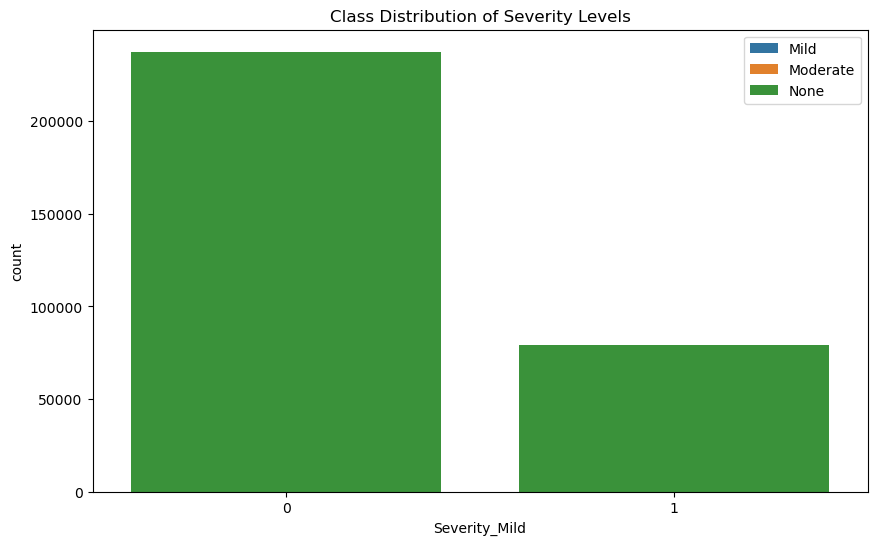

In [8]:
# 2. Visualization - Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity_Mild', data=df, label='Mild')
sns.countplot(x='Severity_Moderate', data=df, label='Moderate')
sns.countplot(x='Severity_None', data=df, label='None')
plt.title("Class Distribution of Severity Levels")
plt.legend(['Mild', 'Moderate', 'None'])
plt.show()

In [9]:
# 3. Model Training for Each Severity Level
models = {}
accuracies = {}

for target in ['Severity_Mild_Binary', 'Severity_Moderate_Binary', 'Severity_None_Binary']:
    y = df[target]
    y_train = y[X_train.index]
    y_test = y[X_test.index]

    # Train XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42, scale_pos_weight=len(y[y==0])/len(y[y==1]))  # Adjust for imbalance
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[target] = accuracy
    models[target] = model

    print(f"{target} Accuracy: {accuracy:.4f}")

Severity_Mild_Binary Accuracy: 0.4648
Severity_Moderate_Binary Accuracy: 0.4628
Severity_None_Binary Accuracy: 0.4541


In [10]:
# Select best initial feature set (based on average accuracy across models)
best_initial_accuracy = sum(accuracies.values()) / len(accuracies)
print(f"\nAverage Accuracy with Initial Features: {best_initial_accuracy:.4f}")



Average Accuracy with Initial Features: 0.4606


In [11]:
# 4. Feature Reduction
# Use the first model (Severity_Mild_Binary) for feature importance
importance = pd.DataFrame({
    "Feature": initial_features,
    "Importance": models['Severity_Mild_Binary'].feature_importances_
}).sort_values("Importance", ascending=False)

print("\nFeature Importance:\n", importance)


Feature Importance:
                     Feature  Importance
14            Gender_Female    0.082873
9                   Age_0-9    0.073568
11                Age_20-24    0.070809
15              Gender_Male    0.067016
5                     Pains    0.065190
1                 Dry-Cough    0.064743
7                Runny-Nose    0.063754
10                Age_10-19    0.061309
2   Difficulty-in-Breathing    0.061258
13                  Age_60+    0.060809
0                 Tiredness    0.059833
6          Nasal-Congestion    0.058576
3               Sore-Throat    0.056648
4              None_Sympton    0.055419
8         None_Experiencing    0.050723
12                Age_25-59    0.047472


In [12]:
# Select top 5 features
top_features = importance["Feature"].head(5).tolist()
print(f"Top 5 Features: {top_features}")


Top 5 Features: ['Gender_Female', 'Age_0-9', 'Age_20-24', 'Gender_Male', 'Pains']


In [25]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7168087121212121
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     47385
           1       0.44      0.43      0.43     15975

    accuracy                           0.72     63360
   macro avg       0.62      0.62      0.62     63360
weighted avg       0.71      0.72      0.72     63360



In [13]:
# Retrain models with reduced features
X_reduced = X[top_features]
X_train_red, X_test_red, _, _ = train_test_split(X_reduced, df[['Severity_Mild_Binary', 'Severity_Moderate_Binary', 'Severity_None_Binary']], test_size=0.2, random_state=42)


In [16]:
reduced_accuracies = {}
for target in ['Severity_Mild_Binary', 'Severity_Moderate_Binary', 'Severity_None_Binary']:
    y = df[target]
    y_train_red = y[X_train_red.index]
    y_test_red = y[X_test_red.index]

    model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42, scale_pos_weight=len(y[y==0])/len(y[y==1]))
    model.fit(X_train_red, y_train_red)
    y_pred_red = model.predict(X_test_red)
    accuracy = accuracy_score(y_test_red, y_pred_red)
    reduced_accuracies[target] = accuracy
    models[target] = model  # Update model with reduced features

    print(f"{target} Accuracy with Reduced Features: {accuracy:.4f}")

# Average accuracy with reduced features
best_reduced_accuracy = sum(reduced_accuracies.values()) / len(reduced_accuracies)
print(f"\nAverage Accuracy with Reduced Features: {best_reduced_accuracy:.4f}")



Severity_Mild_Binary Accuracy with Reduced Features: 0.5536
Severity_Moderate_Binary Accuracy with Reduced Features: 0.5219
Severity_None_Binary Accuracy with Reduced Features: 0.4025

Average Accuracy with Reduced Features: 0.4927


In [24]:
# Define base directory (where the notebook is located)
base_dir = "/home/ichigo/Desktop/Medical diagnosis uisng AI"
print(f"Base directory: {base_dir}")

Base directory: /home/ichigo/Desktop/Medical diagnosis uisng AI


In [25]:

# Save models in the same directory as the notebook (without Models subdirectory)
print("\nSaving models...")
for target, model in models.items():
    model_path = os.path.join(base_dir, f"Asthama_{target.replace('_Binary', '')}_model.pkl")
    try:
        with open(model_path, "wb") as file:
            pickle.dump(model, file)
        print(f"Saved model to {model_path}")
    except Exception as e:
        print(f"Error saving model for {target}: {str(e)}")


Saving models...
Saved model to /home/ichigo/Desktop/Medical diagnosis uisng AI/Asthama_Severity_Mild_model.pkl
Saved model to /home/ichigo/Desktop/Medical diagnosis uisng AI/Asthama_Severity_Moderate_model.pkl
Saved model to /home/ichigo/Desktop/Medical diagnosis uisng AI/Asthama_Severity_None_model.pkl
